In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Data

Load data as `msgpack`

In [48]:
data = pd.read_msgpack("data_2018-07-21-19-28-00.msgpack")
df = pd.DataFrame.from_dict(data)
df.columns = ["f", "msgtype", "pwm", "t", "t0", "timestamp"]
df.head()
if(df.iloc[0].timestamp > 0):
    df.timestamp -= df.iloc[0].timestamp

In [49]:
df.head()

,f,msgtype,pwm,t,t0,timestamp
0,0.530870,2,0,24.742735,23.887173,0.000000
1,0.244246,2,0,24.742735,23.887173,0.019897
2,0.600666,2,0,24.742735,23.887173,0.039001
3,0.803225,2,0,24.742735,23.883242,0.058083
4,0.970867,2,0,24.742735,23.883242,0.077492


Clean $ F_t < F_{min} $

In [ ]:
df.drop(df[df.f < 40].index, inplace=True)

Replace PWM$=0$ with PWM$=NaN$

In [53]:
df.pwm.replace(to_replace=0, value=np.NaN, inplace=True)

## Graphs

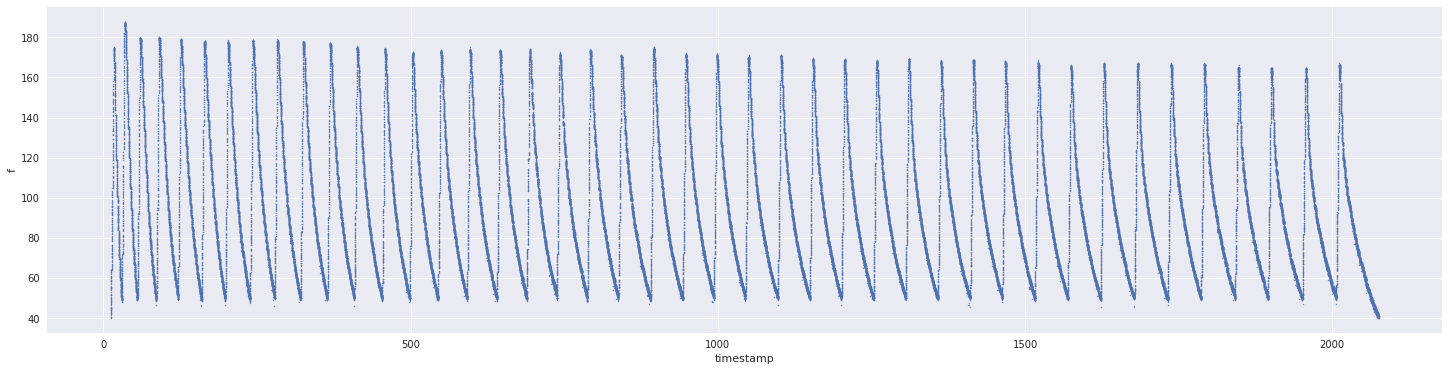

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(25,6))
sns.regplot(df.timestamp, df.f, fit_reg=False, scatter_kws={"s": 2})

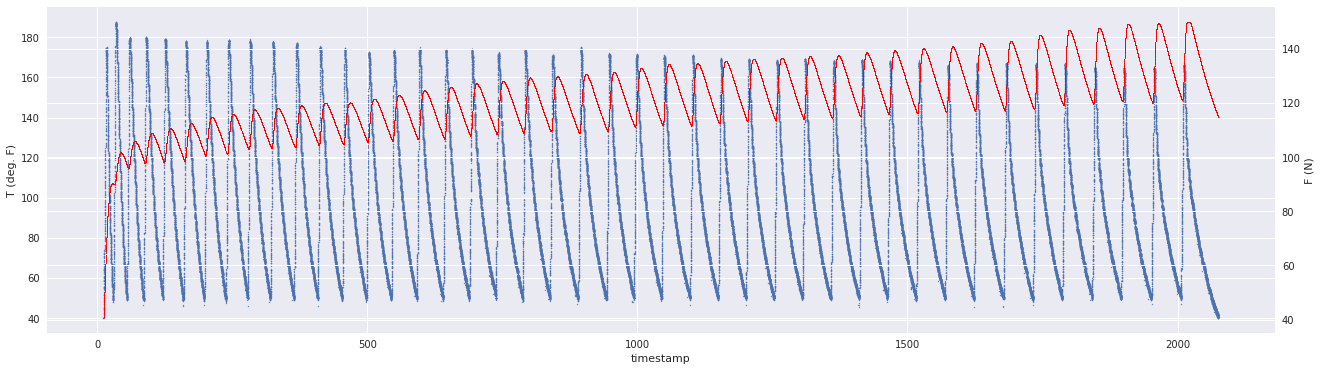

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(22,6))
sns.regplot(df.timestamp, df.f, ax=ax, fit_reg=False, scatter_kws={"s": 2})
ax2 = ax.twinx()
sns.regplot(df.timestamp, df.t, ax=ax2, fit_reg=False, scatter_kws={"s": 1, "color": "red"})

ax.set_ylabel('T (deg. F)')
ax2.set_ylabel('F (N)');  # relative to plt.rcParams['font.size']

In [78]:
df.f.corr(df.t)

0.14381012171112012

In [76]:
f_and_t = df[['f', '']]

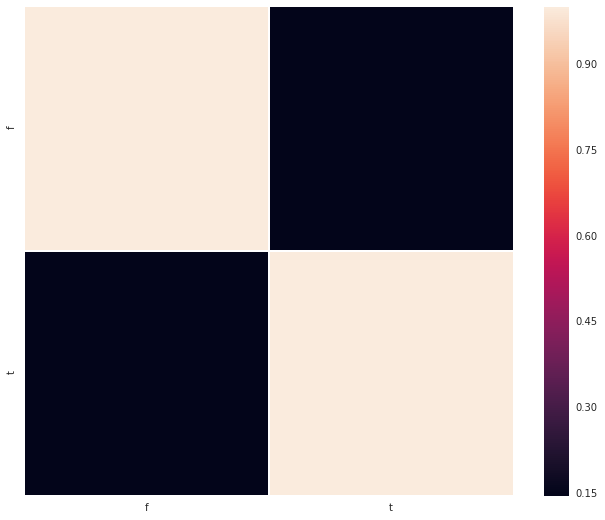

In [77]:
f, ax = plt.subplots(figsize=(11, 9))
corr = f_and_t.corr()
sns.heatmap(corr, square=True, linewidths=.5)